
LOADING DATA FROM GOOG.CSV
Data loaded successfully!
Date range: 2004-08-19 to 2023-06-27
Number of trading days: 4746
Columns: Open, High, Low, Close, Adj Close, Volume

Sample data:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512

FEATURE ENGINEERING - TECHNICAL INDICATORS

Technical indicators calculated successfully
New features: SMA10, SMA30, SMA50, EMA10, EMA20, MACD, MACD_hist, RSI, BB_upper, BB_lower, Momentum

SPLITTING DATA BY TIME PERIOD
Training data (2004-2018): 3617 days from 2004-08-19 to 2018-12-31
Testing data (20

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,249 (489.25 KB)

 Trainable params: 125,249 (489.25 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING
Training model with 50 epochs and batch size 32...
Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: nan
Epoch 1: val_loss did not improve from inf
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - loss: nan - val_loss: nan
Epoch 2/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: nan
Epoch 2: val_loss did not improve from inf
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: nan - val_loss: nan
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: nan
Epoch 3: val_loss did not improve from inf
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: nan - val_loss: nan
Epoch 4/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: nan
Epoch 4: val_loss did not improve from inf
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - loss: nan - val_loss: nan
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: nan
Epoch 5: val_loss did not improve from inf
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: nan - val_loss: nan
Epoch 6/50
100/101 ━━━━━━━━━━

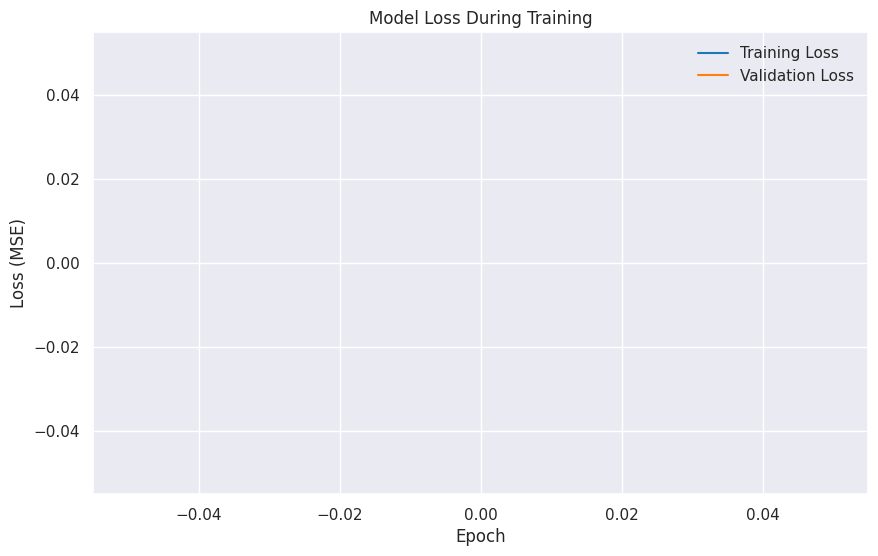


MODEL EVALUATION (2019-2020)
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


ValueError: Input contains NaN.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For data processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style="darkgrid")

# Define color palette for plots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# 1. DATA LOADING AND PREPARATION
print("\n" + "="*50)
print("LOADING DATA FROM GOOG.CSV")
print("="*50)

# Load data from GOOG.csv
df = pd.read_csv('GOOG.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print(f"Data loaded successfully!")
print(f"Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"Number of trading days: {len(df)}")
print(f"Columns: {', '.join(df.columns)}")
print("\nSample data:")
print(df.head())

# 2. FEATURE ENGINEERING
print("\n" + "="*50)
print("FEATURE ENGINEERING - TECHNICAL INDICATORS")
print("="*50)

# Create technical indicators
def calculate_technical_indicators(df):
    data = df.copy()

    # Simple Moving Averages (SMA)
    data['SMA10'] = data['Close'].rolling(window=10).mean()
    data['SMA30'] = data['Close'].rolling(window=30).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Exponential Moving Averages (EMA)
    data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()
    data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()

    # MACD (Moving Average Convergence Divergence)
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['MACD_hist'] = data['MACD'] - data['MACD_signal']

    # RSI (Relative Strength Index)
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    data['BB_middle'] = data['Close'].rolling(window=20).mean()
    data['BB_std'] = data['Close'].rolling(window=20).std()
    data['BB_upper'] = data['BB_middle'] + 2 * data['BB_std']
    data['BB_lower'] = data['BB_middle'] - 2 * data['BB_std']

    # Momentum (10-day)
    data['Momentum'] = data['Close'] - data['Close'].shift(10)

    # Drop intermediate calculation columns
    data.drop(['EMA12', 'EMA26', 'MACD_signal', 'BB_middle', 'BB_std'], axis=1, inplace=True)

    return data

# Apply technical indicators
data = calculate_technical_indicators(df)
print("\nTechnical indicators calculated successfully")
print(f"New features: {', '.join([col for col in data.columns if col not in df.columns])}")

# 3. SPLIT DATA INTO TRAIN (2004-2018) AND TEST (2019-2020)
print("\n" + "="*50)
print("SPLITTING DATA BY TIME PERIOD")
print("="*50)

# Split train (2004-2018) and test (2019-2020)
train_data = data[data.index < '2019-01-01']
test_data = data[data.index >= '2019-01-01']

print(f"Training data (2004-2018): {len(train_data)} days from {train_data.index.min().strftime('%Y-%m-%d')} to {train_data.index.max().strftime('%Y-%m-%d')}")
print(f"Testing data (2019-2020): {len(test_data)} days from {test_data.index.min().strftime('%Y-%m-%d')} to {test_data.index.max().strftime('%Y-%m-%d')}")

# 4. PREPROCESSING
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i+sequence_length])
        y_seq.append(y[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Define sequence length
sequence_length = 60
print(f"Using sequence length of {sequence_length} days")

# Prepare features and target
features = data.drop(['Volume', 'Adj Close'], axis=1)
target_col = 'Close'

# Normalize data
feature_scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on training data only
feature_scaler.fit(train_data[features.columns])
# Transform both train and test
train_data_scaled = feature_scaler.transform(train_data[features.columns])
test_data_scaled = feature_scaler.transform(test_data[features.columns])

# Separate scaler for target
target_scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on training target only
target_scaler.fit(train_data[[target_col]])
# Transform both train and test targets
train_target_scaled = target_scaler.transform(train_data[[target_col]])
test_target_scaled = target_scaler.transform(test_data[[target_col]])

# Create sequences
X_train, y_train = create_sequences(train_data_scaled, train_target_scaled, sequence_length)
X_test, y_test = create_sequences(test_data_scaled, test_target_scaled, sequence_length)

print(f"Training sequences: {X_train.shape}")
print(f"Testing sequences: {X_test.shape}")

# 5. BUILD LSTM MODEL
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)

def build_lstm_model(input_shape, lstm_units=128, dropout_rate=0.2):
    model = Sequential([
        # First LSTM layer with return sequences for stacking
        LSTM(lstm_units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),

        # Second LSTM layer
        LSTM(lstm_units//2, return_sequences=False),
        Dropout(dropout_rate),

        # Dense layers
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dropout(dropout_rate),

        # Output layer
        Dense(1)
    ])

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# Get input shape from training data
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_lstm_model(input_shape)
model.summary()

# 6. TRAIN MODEL
print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

# Setup callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Train model
epochs = 50
batch_size = 32
print(f"Training model with {epochs} epochs and batch size {batch_size}...")

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# 7. PLOT TRAINING HISTORY
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color=colors[0])
plt.plot(history.history['val_loss'], label='Validation Loss', color=colors[1])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# 8. EVALUATE MODEL ON TEST DATA (2019-2020)
print("\n" + "="*50)
print("MODEL EVALUATION (2019-2020)")
print("="*50)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_inv = target_scaler.inverse_transform(y_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mape = np.mean(np.abs((y_test_inv - y_pred) / y_test_inv)) * 100
r2 = r2_score(y_test_inv, y_pred)

print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# 9. PLOT PREDICTIONS VS ACTUAL
print("\n" + "="*50)
print("VISUALIZATION OF PREDICTIONS")
print("="*50)

# Get dates for the test predictions
test_dates = test_data.index[sequence_length:].values

# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_inv, label='Actual Google Stock Price', color=colors[0])
plt.plot(test_dates, y_pred, label='Predicted Google Stock Price', color=colors[1])
plt.title('Google Stock Price Prediction (2019-2020)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot error distribution
errors = y_test_inv - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, color=colors[0])
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# 10. PLOT SOME TECHNICAL INDICATORS WITH PREDICTIONS
print("\n" + "="*50)
print("TECHNICAL INDICATORS WITH PREDICTIONS")
print("="*50)

# Create a visualization of the last 180 days of test data
last_n_days = 180
if len(test_dates) > last_n_days:
    plot_dates = test_dates[-last_n_days:]
    plot_actual = y_test_inv[-last_n_days:]
    plot_pred = y_pred[-last_n_days:]

    # Get corresponding technical indicators
    plot_data = test_data.iloc[-last_n_days:].copy()

    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

    # Plot 1: Price and Predictions
    axes[0].plot(plot_dates, plot_actual, label='Actual Price', color=colors[0])
    axes[0].plot(plot_dates, plot_pred, label='Predicted Price', color=colors[1])
    axes[0].set_title('Google Stock Price: Actual vs Predicted')
    axes[0].set_ylabel('Price ($)')
    axes[0].legend()
    axes[0].grid(True)

    # Plot 2: Moving Averages
    axes[1].plot(plot_data.index, plot_data['Close'], label='Close Price', color=colors[0])
    axes[1].plot(plot_data.index, plot_data['SMA10'], label='SMA10', color=colors[1])
    axes[1].plot(plot_data.index, plot_data['SMA30'], label='SMA30', color=colors[2])
    axes[1].plot(plot_data.index, plot_data['SMA50'], label='SMA50', color=colors[3])
    axes[1].set_title('Moving Averages')
    axes[1].set_ylabel('Price ($)')
    axes[1].legend()
    axes[1].grid(True)

    # Plot 3: RSI
    axes[2].plot(plot_data.index, plot_data['RSI'], label='RSI', color=colors[0])
    axes[2].axhline(y=70, color='r', linestyle='--', alpha=0.5)
    axes[2].axhline(y=30, color='g', linestyle='--', alpha=0.5)
    axes[2].set_title('Relative Strength Index (RSI)')
    axes[2].set_ylabel('RSI')
    axes[2].set_ylim(0, 100)
    axes[2].legend()
    axes[2].grid(True)

    # Format x-axis
    plt.xlabel('Date')
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("LSTM STOCK PRICE PREDICTION COMPLETE")
print("="*50)